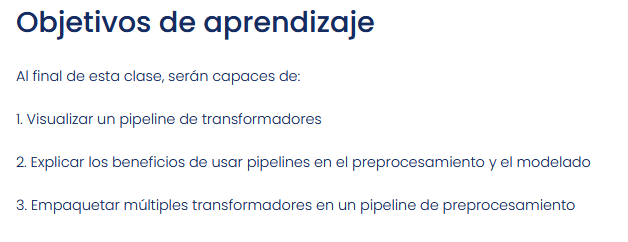

# que es un pipeline en el aprendizaje automatico ?

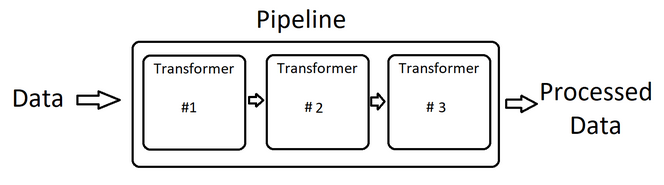


Un pipeline contiene multiples transformadores, o incluso modelos, y realiza operaciones en datos EN SECUENCIA.
Comparen esto en ColumnTransformers que realiza operaciones en los datos EN PARALELO. Cuando un pipeline se ajusta a los datos, se ajustan todos los transformadores dentro de ella. 

Cuando los datos se transforman usando un pipeline, los datos son transformados por el primer transformador , luego el segundo transformador, etc.

Un pipeline puede contener cualquier numero de transformadores siempre y cuando tengan los metodos .fit() y transform(). Estos se llaman "steps"

Si lo necesitan, un solo estimador o modelo se puede cologar al final de un pipeline.

Lo mas importante es recordad que los pipelines estan ordenados, asi que importan los que usen para crearlos.

Los pipelines pueden incluso contener ColumnTransformer y ColumnTransformer que contienen pipelines.

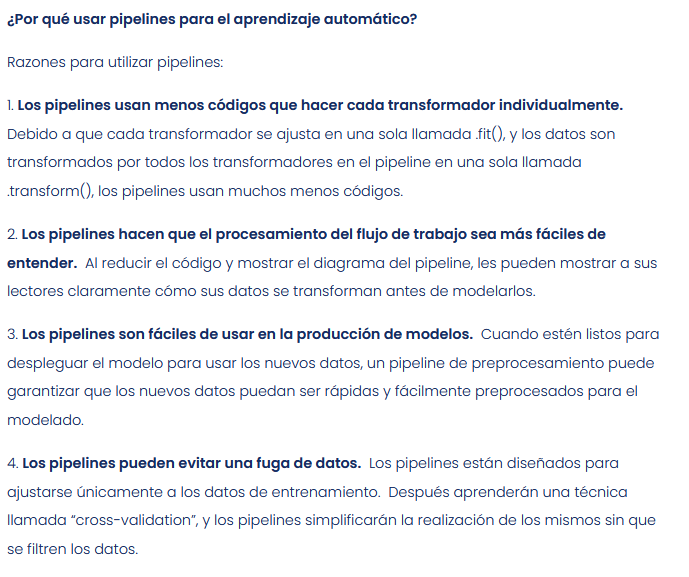

# Como usar pipelines para el preprocesamiento de datos en python?

Cuando instancian un pipeline pasaran un numero de transformadores (y un estimador al final, si es necesario) en el orden en que se desea que se apliquen, utilizaremos sklearn.pipeline.make_pipeline() para construir nuestros pipelines. esta funcion es un poco mas facil de usar que el mismo constructor, Pipeline()

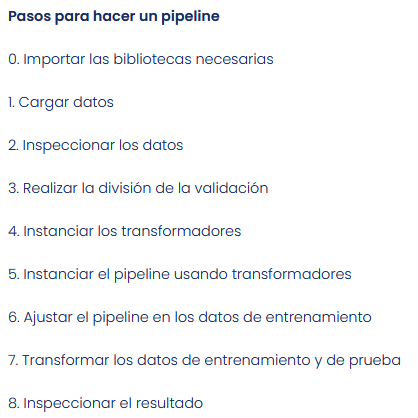

# Cojunto de datos

Tiene informacion sobre numerosos paises a lo largo de varios anios.
Aca se busca predecir la esperanza de vida usando otras caracteristicas.

#Importar bibliotecas

Importaremos nuestro imputer, scaler y tambien la funcion make_pipeline() para crear nuestro objeto pipeline. Tambien importaremos sklearn.set_config y estableceremos la configuracion de visualizacion como "diagram". de esta forma, cuando inspeccionemos nuestro pipeline, sklearn nos dibujara un diagrama en lugar de solo mostrarnos una descripcion textual de los pasos.

In [9]:
# Imports
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')


In [10]:
#load the data
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQG5QTgHn7O1FaenQgpiHadFAza6cfG-cXznWh9a_Z-QWsbsrv3iJ5MpDdSSKTK7ZpTpRosOkK_LR_E/pub?output=csv'
df = pd.read_csv(path, index_col='CountryYear')
df.head()


,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
CountryYear,,,,,,,,,,,,,,,,,,,,
Afghanistan2015,0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan2014,0,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan2013,0,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan2012,0,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan2011,0,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
print(df.info(), "\n")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, Afghanistan2015 to Zimbabwe2000
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2928 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   int64  
 3   infant deaths                    2928 non-null   int64  
 4   Alcohol                          2735 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6   Hepatitis B                      2375 non-null   float64
 7   Measles                          2928 non-null   int64  
 8   BMI                              2896 non-null   float64
 9   under-five deaths                2928 non-null   int64  
 10  Polio                            2909 non-null   float64
 11  Total expenditure                2702 non-null   float64
 12  Dip

Podemos ver que diversas columnas le faltan datos. se requiere imputar los datos faltantes antes que escalemos los datos, por lo que el pipeline se ordenara como:

paso 1. Imputar

paso 2. Escalar


Todos nuestros datos son numericos, asi que no necesitamos realizar una codificacion onehotencoder a los datos. tambien podemos usar una imputacion de mediana o de media en todas las columnas.

Si quisieramos, PODRIAMOS usar columntransformer para dividir las columnas por numeros enteros y flotantes y aplicar la imputacion ade la media a los flotantes, y la imputacion de la mediana a los enteros y luego escalarlos a todos.

Aprenderan como combinar ColumnTransformer y Pipelines en otra clase.

Para esta clase, solo usaran un imputador de mediana para todas las columnas.

# Train Test Split

vamos a predecir la "Life expectancy" por lo que la fijaremos como objetivo

In [13]:
X = df.drop(columns="Life expectancy") 

y = df["Life expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =42)

# Instanciar los transformadores

In [14]:
# instanciar imputador y escalador
median_imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

# Instanciar el pipeline

In [15]:
# combinar imputer y escalador en un pipeline

preprocessing_pipeline = make_pipeline(median_imputer, scaler)
preprocessing_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

podemos ver en el diagrama anterior que el primer paso en la tuberia es el imputer y el segundo paso es el scaler

# Ajustar el pipeline en los datos de entrenamiento


In [16]:
preprocessing_pipeline.fit(X_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

# Transformar los datos de entrenamiento y de prueba

In [17]:
X_train_processed = preprocessing_pipeline.transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

# Los transformadores scikit-learn y pipelines siempre devuelven arrays de numpy, no en dataframes de pandas.

Podemos usar np.isnan(array).sum().sum() para contar los valores faltantes en el array resultante.

podemos ver que no hay valores faltantes y que todos los valores parecen estar escalados.

In [18]:
# inspeccionar el resultado de la transformacion

print(np.isnan(X_train_processed).sum().sum(), " missing values \n")
X_train_processed

0  missing values 



array([[ 0.        , -0.81229166, -0.26366021, ..., -0.87868801,
         1.19451878,  1.92222335],
       [ 0.        ,  1.43809769,  0.15576412, ...,  0.58477555,
         0.22791761,  0.08271906],
       [ 0.        ,  2.02690924, -0.18501814, ...,  0.87303352,
        -0.68443553, -0.80637468],
       ...,
       [ 0.        , -1.10266448, -0.11511409, ..., -0.10260885,
        -0.88170108, -1.17427554],
       [ 0.        , -0.73163255, -0.24618419, ..., -0.96738278,
         0.97259504,  0.87983758],
       [ 0.        ,  1.43003177, -0.20249416, ...,  1.07259673,
        -3.11080174, -2.24731971]])

In [20]:
X_train_processed_df = pd.DataFrame(X_train_processed)
X_train_processed_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,-0.812292,-0.263660,0.576498,3.980430,0.397596,-0.210002,0.915824,-0.267716,0.709313,1.528662,0.706285,-0.324668,3.027465,-0.196608,-0.868293,-0.878688,1.194519,1.922223
1,0.0,1.438098,0.155764,-1.158369,-0.374618,0.397596,0.502075,-0.962220,0.227591,-3.349408,-0.082413,-3.242927,-0.167257,-0.364664,-0.167930,0.650505,0.584776,0.227918,0.082719
2,0.0,2.026909,-0.185018,-0.534022,-0.374618,0.397596,0.110118,-1.778543,-0.178815,-3.306685,-1.362161,-3.201357,0.993643,-0.364664,-0.167930,0.967865,0.873034,-0.684436,-0.806375
3,0.0,-0.594512,-0.263660,1.725400,3.530549,0.397596,-0.209829,0.840702,-0.267716,0.452973,1.603210,0.456861,-0.324668,3.168864,-0.088476,-0.822956,-0.856514,1.312878,1.401030
4,0.0,-0.731633,-0.263660,2.078515,4.503751,0.397596,-0.205086,0.960897,-0.267716,0.452973,1.135212,0.456861,-0.324668,4.102906,-0.107131,-1.026973,-1.033904,1.367126,1.799590


# Resumen

Cuando esten preparando sus datos para modelar, a menudo tendran que realizar multiples pasos de preprocesamiento. Los pipelines pueden agrupar los transformadores en un objeto de preprocesamiento transparente que los aplica en pasos secuenciales.

al usar pipelines en preprocesamiento en el flujo de trabajo de aprendizaje automatico les ahorrara tiempo, reducira el error, evitara la fuga de datos y preparara los modelos para herramientas futuras de aprendizaje automatico